In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
import torch

c:\Users\ankit\anaconda3\envs\project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import os

# Initialize empty lists to store concatenated values and labels
X_train = []
X_test = []
y_train = []
y_test = []

# Read the train split file
train_split = pd.read_csv('./CSV/train_split.csv')

# Iterate through transcript IDs in the train split
for transcript_id in train_split['Participant_ID']:
    filename = f'./transcript/{transcript_id}_TRANSCRIPT.csv'

    # Check if the transcript file exists
    if os.path.exists(filename):
        # Read the CSV file
        data = pd.read_csv(filename)

        # Select the 'Text' column and concatenate values
        text_values = ' '.join(data['Text'].astype(str).fillna(''))

        # Append concatenated text to X_train
        X_train.append(text_values)

        # Extract the corresponding label from the train split
        label_row = train_split[train_split['Participant_ID'] == transcript_id]
        if not label_row.empty:
            label = label_row.iloc[0]['PHQ_Binary']
            y_train.append(label)

# Read the test split file
test_split = pd.read_csv('./CSV/test_split.csv')

# Iterate through transcript IDs in the test split
for transcript_id in test_split['Participant_ID']:
    filename = f'./transcript/{transcript_id}_TRANSCRIPT.csv'

    # Check if the transcript file exists
    if os.path.exists(filename):
        # Read the CSV file
        data = pd.read_csv(filename)

        # Select the 'Text' column and concatenate values
        text_values = ' '.join(data['Text'].astype(str).fillna(''))

        # Append concatenated text to X_test
        X_test.append(text_values)

        # Extract the corresponding label from the test split
        label_row = test_split[test_split['Participant_ID'] == transcript_id]
        if not label_row.empty:
            label = label_row.iloc[0]['PHQ_Binary']
            y_test.append(label)


In [2]:
import pandas as pd
import os
import re

# Initialize empty lists to store concatenated values and labels
X_train = []
X_test = []
y_train = []
y_test = []

# Read the train split file
train_split = pd.read_csv('./CSV/train_split.csv')

# Iterate through transcript IDs in the train split
for transcript_id in train_split['Participant_ID']:
    filename = f'./transcript/{transcript_id}_AUDIO.txt'
    # Check if the transcript file exists
    if os.path.exists(filename):
        # Read the text file
        with open(filename, 'r') as file:
            text_values = file.read()
        # Append concatenated text to X_train
        X_train.append(text_values)
        # Extract the corresponding label from the train split
        label_row = train_split[train_split['Participant_ID'] == transcript_id]
        if not label_row.empty:
            label = label_row.iloc[0]['PHQ_Binary']
            y_train.append(label)

# Read the test split file
test_split = pd.read_csv('./CSV/test_split.csv')

# Iterate through transcript IDs in the test split
for transcript_id in test_split['Participant_ID']:
    filename = f'./transcript/{transcript_id}_AUDIO.txt'
    # Check if the transcript file exists
    if os.path.exists(filename):
        # Read the text file
        with open(filename, 'r') as file:
            text_values = file.read()
        # Append concatenated text to X_test
        X_test.append(text_values)
        # Extract the corresponding label from the test split
        label_row = test_split[test_split['Participant_ID'] == transcript_id]
        if not label_row.empty:
            label = label_row.iloc[0]['PHQ_Binary']
            y_test.append(label)

In [ ]:
import pandas as pd
import os
import re

# Initialize empty lists to store concatenated values and labels
X_train = []
X_test = []
y_train = []
y_test = []

# Read the train split file
train_split = pd.read_csv('./CSV/train_split.csv')

# Iterate through transcript IDs in the train split
for transcript_id in train_split['Participant_ID']:
    filename = f'./transcript/{transcript_id}_AUDIO.txt'
    # Check if the transcript file exists
    if os.path.exists(filename):
        # Read the text file
        with open(filename, 'r') as file:
            text_values = file.read()
        # Remove '...' pattern from the text
        text_values = re.sub(r'\.\.\.', '', text_values)
        # Append concatenated text to X_train
        X_train.append(text_values)
        # Extract the corresponding label from the train split
        label_row = train_split[train_split['Participant_ID'] == transcript_id]
        if not label_row.empty:
            label = label_row.iloc[0]['PHQ_Binary']
            y_train.append(label)

# Read the test split file
test_split = pd.read_csv('./CSV/test_split.csv')

# Iterate through transcript IDs in the test split
for transcript_id in test_split['Participant_ID']:
    filename = f'./transcript/{transcript_id}_AUDIO.txt'
    # Check if the transcript file exists
    if os.path.exists(filename):
        # Read the text file
        with open(filename, 'r') as file:
            text_values = file.read()
        # Remove '...' pattern from the text
        text_values = re.sub(r'\.\.', '', text_values)
        # Append concatenated text to X_test
        X_test.append(text_values)
        # Extract the corresponding label from the test split
        label_row = test_split[test_split['Participant_ID'] == transcript_id]
        if not label_row.empty:
            label = label_row.iloc[0]['PHQ_Binary']
            y_test.append(label)

In [4]:
# Print the head of the lists
print("X_train head:")
for text in X_train[:5]:
    print(text[:100], "...")

print("\nX_test head:")
for text in X_test[:5]:
    print(text[:100], "...")

print("\ny_train head:")
print(y_train[:5])

print("\ny_test head:")
print(y_test[:5])

X_train head:
 You can see the ground a little bit. Let's take a quick look at the next slide. Let's take a quick  ...
 Okay, now let's get started. Here's how funny. Okay, now let's get started. Here's how funny. What' ...
 you I'm so good I'm off the edge of the color We're some things you really like about your life The ...
 Okay, looks good. So if we can just move around a little bit to activate the connect and we'll tell ...
 Okay, so now let me show the Xbox connective to the opposite of the zoom. So we have to wait until  ...

X_test head:
 you you you you you you you you you okay yes let's go what is the thing to write the letter the wea ...
 This is super neat. I like this. Me either at all. Can you do it at home? A links to your Twitter.  ...
 you you she had a name oh perfect I feel like I'm gonna speed dating I'm so full my name is Justin  ...
 I just heard the background of where about TV about these robots in with off to stick I just was ki ...
 Yeah, just got it. I just 

In [5]:
# Fine-tune RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
model = model.to('cuda')

In [7]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [8]:
from transformers import TrainingArguments
from transformers import Trainer

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)

    # # Confusion matrix
    # cm = confusion_matrix(labels, preds)
    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    # plt.xlabel('Predicted labels')
    # plt.ylabel('True labels')
    # plt.title('Confusion Matrix')
    # plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [10]:
import torch
from transformers import Trainer, TrainingArguments

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)

training_args = TrainingArguments(
    output_dir='./output',  # Specify the directory to save the trained model and logs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=50,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy='epoch',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

train_result = trainer.train()

c:\Users\ankit\anaconda3\envs\project\lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(
  2%|▏         | 20/1000 [00:50<32:25,  1.99s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                 
  2%|▏         | 20/1000 [00:54<32:25,  1.99s/it]

{'eval_loss': 0.7024496793746948, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.7514, 'eval_samples_per_second': 9.596, 'eval_steps_per_second': 1.333, 'epoch': 1.0}


  4%|▍         | 40/1000 [01:43<30:43,  1.92s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                 
  4%|▍         | 40/1000 [01:47<30:43,  1.92s/it]

{'eval_loss': 0.6256258487701416, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.1481, 'eval_samples_per_second': 8.679, 'eval_steps_per_second': 1.205, 'epoch': 2.0}


  6%|▌         | 60/1000 [02:37<31:09,  1.99s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                 
  6%|▌         | 60/1000 [02:42<31:09,  1.99s/it]

{'eval_loss': 0.6844617128372192, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.261, 'eval_samples_per_second': 8.449, 'eval_steps_per_second': 1.173, 'epoch': 3.0}


  8%|▊         | 80/1000 [03:33<31:29,  2.05s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                 
  8%|▊         | 80/1000 [03:38<31:29,  2.05s/it]

{'eval_loss': 0.6248093247413635, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 5.092, 'eval_samples_per_second': 7.07, 'eval_steps_per_second': 0.982, 'epoch': 4.0}


 10%|█         | 100/1000 [04:23<25:08,  1.68s/it]

{'loss': 0.573, 'learning_rate': 4.5e-05, 'epoch': 5.0}


c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 10%|█         | 100/1000 [04:27<25:08,  1.68s/it]

{'eval_loss': 0.6191012263298035, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.2449, 'eval_samples_per_second': 11.094, 'eval_steps_per_second': 1.541, 'epoch': 5.0}


 12%|█▏        | 120/1000 [05:11<24:38,  1.68s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 12%|█▏        | 120/1000 [05:14<24:38,  1.68s/it]

{'eval_loss': 0.6531381607055664, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.4241, 'eval_samples_per_second': 10.514, 'eval_steps_per_second': 1.46, 'epoch': 6.0}


 14%|█▍        | 140/1000 [05:57<24:43,  1.73s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 14%|█▍        | 140/1000 [06:01<24:43,  1.73s/it]

{'eval_loss': 0.6224928498268127, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.4072, 'eval_samples_per_second': 10.566, 'eval_steps_per_second': 1.467, 'epoch': 7.0}


 16%|█▌        | 160/1000 [06:44<23:58,  1.71s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 16%|█▌        | 160/1000 [06:47<23:58,  1.71s/it]

{'eval_loss': 0.6546098589897156, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.4372, 'eval_samples_per_second': 10.474, 'eval_steps_per_second': 1.455, 'epoch': 8.0}


                                                  
 18%|█▊        | 180/1000 [07:34<23:45,  1.74s/it]

{'eval_loss': 0.644680917263031, 'eval_accuracy': 0.6111111111111112, 'eval_precision': 0.6111111111111112, 'eval_recall': 0.6111111111111112, 'eval_f1': 0.6111111111111112, 'eval_runtime': 3.4526, 'eval_samples_per_second': 10.427, 'eval_steps_per_second': 1.448, 'epoch': 9.0}


 20%|██        | 200/1000 [08:18<25:10,  1.89s/it]

{'loss': 0.5208, 'learning_rate': 4e-05, 'epoch': 10.0}


c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 20%|██        | 200/1000 [08:22<25:10,  1.89s/it]

{'eval_loss': 0.6108354330062866, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.1772, 'eval_samples_per_second': 8.618, 'eval_steps_per_second': 1.197, 'epoch': 10.0}


 22%|██▏       | 220/1000 [09:12<22:36,  1.74s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 22%|██▏       | 220/1000 [09:16<22:36,  1.74s/it]

{'eval_loss': 0.6369421482086182, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.8321, 'eval_samples_per_second': 9.394, 'eval_steps_per_second': 1.305, 'epoch': 11.0}


 24%|██▍       | 240/1000 [10:13<29:20,  2.32s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 24%|██▍       | 240/1000 [10:17<29:20,  2.32s/it]

{'eval_loss': 0.6770021915435791, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.0594, 'eval_samples_per_second': 8.868, 'eval_steps_per_second': 1.232, 'epoch': 12.0}


 26%|██▌       | 260/1000 [11:06<21:14,  1.72s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 26%|██▌       | 260/1000 [11:10<21:14,  1.72s/it]

{'eval_loss': 0.6777262091636658, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.7912, 'eval_samples_per_second': 9.496, 'eval_steps_per_second': 1.319, 'epoch': 13.0}


                                                  
 28%|██▊       | 280/1000 [12:00<22:53,  1.91s/it]

{'eval_loss': 0.6414589285850525, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.6519097222222222, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.6419103313840155, 'eval_runtime': 3.86, 'eval_samples_per_second': 9.326, 'eval_steps_per_second': 1.295, 'epoch': 14.0}


 30%|███       | 300/1000 [12:45<22:51,  1.96s/it]

{'loss': 0.5471, 'learning_rate': 3.5e-05, 'epoch': 15.0}


c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 30%|███       | 300/1000 [12:48<22:51,  1.96s/it]

{'eval_loss': 0.6133815050125122, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.5205, 'eval_samples_per_second': 10.226, 'eval_steps_per_second': 1.42, 'epoch': 15.0}


 32%|███▏      | 320/1000 [13:36<21:56,  1.94s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 32%|███▏      | 320/1000 [13:40<21:56,  1.94s/it]

{'eval_loss': 0.7794591784477234, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.6236, 'eval_samples_per_second': 7.786, 'eval_steps_per_second': 1.081, 'epoch': 16.0}


 34%|███▍      | 340/1000 [14:28<20:28,  1.86s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 34%|███▍      | 340/1000 [14:33<20:28,  1.86s/it]

{'eval_loss': 0.6983880996704102, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.8528, 'eval_samples_per_second': 7.418, 'eval_steps_per_second': 1.03, 'epoch': 17.0}


                                                  
 36%|███▌      | 360/1000 [15:24<19:13,  1.80s/it]

{'eval_loss': 0.6620115637779236, 'eval_accuracy': 0.6111111111111112, 'eval_precision': 0.5662287903667215, 'eval_recall': 0.6111111111111112, 'eval_f1': 0.5823045267489712, 'eval_runtime': 3.4886, 'eval_samples_per_second': 10.319, 'eval_steps_per_second': 1.433, 'epoch': 18.0}


                                                  
 38%|███▊      | 380/1000 [16:13<19:13,  1.86s/it]

{'eval_loss': 0.7464268207550049, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6338259441707718, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6419753086419754, 'eval_runtime': 5.0835, 'eval_samples_per_second': 7.082, 'eval_steps_per_second': 0.984, 'epoch': 19.0}


 40%|████      | 400/1000 [17:10<20:12,  2.02s/it]

{'loss': 0.5139, 'learning_rate': 3e-05, 'epoch': 20.0}


                                                  
 40%|████      | 400/1000 [17:14<20:12,  2.02s/it]

{'eval_loss': 0.7816194295883179, 'eval_accuracy': 0.6111111111111112, 'eval_precision': 0.5905349794238683, 'eval_recall': 0.6111111111111112, 'eval_f1': 0.5991452991452991, 'eval_runtime': 4.1481, 'eval_samples_per_second': 8.679, 'eval_steps_per_second': 1.205, 'epoch': 20.0}


                                                  
 42%|████▏     | 420/1000 [18:09<19:33,  2.02s/it]

{'eval_loss': 0.7585105895996094, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.6589506172839507, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5997059609730019, 'eval_runtime': 4.0116, 'eval_samples_per_second': 8.974, 'eval_steps_per_second': 1.246, 'epoch': 21.0}


                                                  
 44%|████▍     | 440/1000 [19:08<19:23,  2.08s/it]

{'eval_loss': 0.8553271889686584, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.662037037037037, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.6633986928104575, 'eval_runtime': 4.4706, 'eval_samples_per_second': 8.053, 'eval_steps_per_second': 1.118, 'epoch': 22.0}


 46%|████▌     | 460/1000 [20:02<19:16,  2.14s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 46%|████▌     | 460/1000 [20:07<19:16,  2.14s/it]

{'eval_loss': 0.6416676044464111, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 4.4434, 'eval_samples_per_second': 8.102, 'eval_steps_per_second': 1.125, 'epoch': 23.0}


                                                  
 48%|████▊     | 480/1000 [21:06<18:24,  2.12s/it]

{'eval_loss': 0.6111900210380554, 'eval_accuracy': 0.6388888888888888, 'eval_precision': 0.587962962962963, 'eval_recall': 0.6388888888888888, 'eval_f1': 0.6021984551396318, 'eval_runtime': 4.3724, 'eval_samples_per_second': 8.233, 'eval_steps_per_second': 1.144, 'epoch': 24.0}


 50%|█████     | 500/1000 [22:00<18:08,  2.18s/it]

{'loss': 0.4681, 'learning_rate': 2.5e-05, 'epoch': 25.0}


                                                  
 50%|█████     | 500/1000 [22:08<18:08,  2.18s/it]

{'eval_loss': 0.7414149641990662, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6338259441707718, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6419753086419754, 'eval_runtime': 4.9334, 'eval_samples_per_second': 7.297, 'eval_steps_per_second': 1.014, 'epoch': 25.0}


                                                  
 52%|█████▏    | 520/1000 [23:13<18:28,  2.31s/it]

{'eval_loss': 1.041326642036438, 'eval_accuracy': 0.6388888888888888, 'eval_precision': 0.6106150793650794, 'eval_recall': 0.6388888888888888, 'eval_f1': 0.6206002427452278, 'eval_runtime': 3.4625, 'eval_samples_per_second': 10.397, 'eval_steps_per_second': 1.444, 'epoch': 26.0}


                                                  
 54%|█████▍    | 540/1000 [24:01<13:35,  1.77s/it]

{'eval_loss': 0.9359588623046875, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6338259441707718, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6419753086419754, 'eval_runtime': 3.515, 'eval_samples_per_second': 10.242, 'eval_steps_per_second': 1.422, 'epoch': 27.0}


                                                  
 56%|█████▌    | 560/1000 [24:50<13:16,  1.81s/it]

{'eval_loss': 0.8907849192619324, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6338259441707718, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6419753086419754, 'eval_runtime': 3.5866, 'eval_samples_per_second': 10.037, 'eval_steps_per_second': 1.394, 'epoch': 28.0}


                                                  
 58%|█████▊    | 580/1000 [25:38<12:20,  1.76s/it]

{'eval_loss': 1.2149499654769897, 'eval_accuracy': 0.6111111111111112, 'eval_precision': 0.5905349794238683, 'eval_recall': 0.6111111111111112, 'eval_f1': 0.5991452991452991, 'eval_runtime': 3.7512, 'eval_samples_per_second': 9.597, 'eval_steps_per_second': 1.333, 'epoch': 29.0}


 60%|██████    | 600/1000 [26:25<14:42,  2.21s/it]

{'loss': 0.4578, 'learning_rate': 2e-05, 'epoch': 30.0}


                                                  
 60%|██████    | 600/1000 [26:29<14:42,  2.21s/it]

{'eval_loss': 0.7863081097602844, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5724358974358974, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5774976657329599, 'eval_runtime': 3.2514, 'eval_samples_per_second': 11.072, 'eval_steps_per_second': 1.538, 'epoch': 30.0}


                                                  
 62%|██████▏   | 620/1000 [27:16<10:53,  1.72s/it]

{'eval_loss': 0.859192967414856, 'eval_accuracy': 0.6388888888888888, 'eval_precision': 0.6106150793650794, 'eval_recall': 0.6388888888888888, 'eval_f1': 0.6206002427452278, 'eval_runtime': 3.4639, 'eval_samples_per_second': 10.393, 'eval_steps_per_second': 1.443, 'epoch': 31.0}


                                                  
 64%|██████▍   | 640/1000 [28:02<10:13,  1.70s/it]

{'eval_loss': 0.7077642679214478, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.6429738562091504, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.6119802984209765, 'eval_runtime': 3.4131, 'eval_samples_per_second': 10.547, 'eval_steps_per_second': 1.465, 'epoch': 32.0}


                                                  
 66%|██████▌   | 660/1000 [28:48<09:45,  1.72s/it]

{'eval_loss': 0.6203240752220154, 'eval_accuracy': 0.7222222222222222, 'eval_precision': 0.7087542087542088, 'eval_recall': 0.7222222222222222, 'eval_f1': 0.6620142309797482, 'eval_runtime': 3.7547, 'eval_samples_per_second': 9.588, 'eval_steps_per_second': 1.332, 'epoch': 33.0}


                                                  
 68%|██████▊   | 680/1000 [29:37<09:14,  1.73s/it]

{'eval_loss': 0.7770522236824036, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.662037037037037, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.6633986928104575, 'eval_runtime': 3.5915, 'eval_samples_per_second': 10.024, 'eval_steps_per_second': 1.392, 'epoch': 34.0}


 70%|███████   | 700/1000 [30:20<08:40,  1.74s/it]

{'loss': 0.4795, 'learning_rate': 1.5e-05, 'epoch': 35.0}


                                                  
 70%|███████   | 700/1000 [30:24<08:40,  1.74s/it]

{'eval_loss': 0.8089656233787537, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6338259441707718, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6419753086419754, 'eval_runtime': 3.4166, 'eval_samples_per_second': 10.537, 'eval_steps_per_second': 1.463, 'epoch': 35.0}


 72%|███████▏  | 720/1000 [31:08<08:01,  1.72s/it]c:\Users\ankit\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
                                                  
 72%|███████▏  | 720/1000 [31:11<08:01,  1.72s/it]

{'eval_loss': 0.7660183310508728, 'eval_accuracy': 0.6944444444444444, 'eval_precision': 0.48225308641975306, 'eval_recall': 0.6944444444444444, 'eval_f1': 0.569216757741348, 'eval_runtime': 3.6121, 'eval_samples_per_second': 9.967, 'eval_steps_per_second': 1.384, 'epoch': 36.0}


                                                  
 74%|███████▍  | 740/1000 [31:58<07:22,  1.70s/it]

{'eval_loss': 0.5944616794586182, 'eval_accuracy': 0.7777777777777778, 'eval_precision': 0.782078853046595, 'eval_recall': 0.7777777777777778, 'eval_f1': 0.748015873015873, 'eval_runtime': 3.4471, 'eval_samples_per_second': 10.444, 'eval_steps_per_second': 1.451, 'epoch': 37.0}


                                                  
 76%|███████▌  | 760/1000 [32:51<07:46,  1.94s/it]

{'eval_loss': 0.6164420247077942, 'eval_accuracy': 0.7777777777777778, 'eval_precision': 0.782078853046595, 'eval_recall': 0.7777777777777778, 'eval_f1': 0.748015873015873, 'eval_runtime': 3.6097, 'eval_samples_per_second': 9.973, 'eval_steps_per_second': 1.385, 'epoch': 38.0}


                                                  
 78%|███████▊  | 780/1000 [33:40<06:24,  1.75s/it]

{'eval_loss': 0.7415611147880554, 'eval_accuracy': 0.6111111111111112, 'eval_precision': 0.6111111111111112, 'eval_recall': 0.6111111111111112, 'eval_f1': 0.6111111111111112, 'eval_runtime': 3.7149, 'eval_samples_per_second': 9.691, 'eval_steps_per_second': 1.346, 'epoch': 39.0}


 80%|████████  | 800/1000 [34:26<06:02,  1.81s/it]

{'loss': 0.4186, 'learning_rate': 1e-05, 'epoch': 40.0}


                                                  
 80%|████████  | 800/1000 [34:29<06:02,  1.81s/it]

{'eval_loss': 0.7927691340446472, 'eval_accuracy': 0.6388888888888888, 'eval_precision': 0.6297008547008546, 'eval_recall': 0.6388888888888888, 'eval_f1': 0.6338313103018985, 'eval_runtime': 3.2861, 'eval_samples_per_second': 10.955, 'eval_steps_per_second': 1.522, 'epoch': 40.0}


                                                  
 82%|████████▏ | 820/1000 [35:17<05:09,  1.72s/it]

{'eval_loss': 0.9850125908851624, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6502057613168725, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6564102564102564, 'eval_runtime': 3.5901, 'eval_samples_per_second': 10.027, 'eval_steps_per_second': 1.393, 'epoch': 41.0}


                                                  
 84%|████████▍ | 840/1000 [36:04<04:31,  1.69s/it]

{'eval_loss': 1.3108590841293335, 'eval_accuracy': 0.6388888888888888, 'eval_precision': 0.6675685425685426, 'eval_recall': 0.6388888888888888, 'eval_f1': 0.64903073286052, 'eval_runtime': 3.4562, 'eval_samples_per_second': 10.416, 'eval_steps_per_second': 1.447, 'epoch': 42.0}


                                                  
 86%|████████▌ | 860/1000 [36:50<04:03,  1.74s/it]

{'eval_loss': 1.2663731575012207, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6502057613168725, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6564102564102564, 'eval_runtime': 3.4159, 'eval_samples_per_second': 10.539, 'eval_steps_per_second': 1.464, 'epoch': 43.0}


                                                  
 88%|████████▊ | 880/1000 [37:36<03:23,  1.70s/it]

{'eval_loss': 1.553987741470337, 'eval_accuracy': 0.6111111111111112, 'eval_precision': 0.6513227513227514, 'eval_recall': 0.6111111111111112, 'eval_f1': 0.6241174284652545, 'eval_runtime': 3.4077, 'eval_samples_per_second': 10.564, 'eval_steps_per_second': 1.467, 'epoch': 44.0}


 90%|█████████ | 900/1000 [38:20<02:51,  1.71s/it]

{'loss': 0.2734, 'learning_rate': 5e-06, 'epoch': 45.0}


                                                  
 90%|█████████ | 900/1000 [38:23<02:51,  1.71s/it]

{'eval_loss': 1.6665276288986206, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5937500000000001, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5881396036675539, 'eval_runtime': 3.2707, 'eval_samples_per_second': 11.007, 'eval_steps_per_second': 1.529, 'epoch': 45.0}


                                                  
 92%|█████████▏| 920/1000 [39:09<02:17,  1.71s/it]

{'eval_loss': 1.533019781112671, 'eval_accuracy': 0.6666666666666666, 'eval_precision': 0.6502057613168725, 'eval_recall': 0.6666666666666666, 'eval_f1': 0.6564102564102564, 'eval_runtime': 3.4432, 'eval_samples_per_second': 10.455, 'eval_steps_per_second': 1.452, 'epoch': 46.0}


                                                  
 94%|█████████▍| 940/1000 [39:56<01:43,  1.73s/it]

{'eval_loss': 1.7940322160720825, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5937500000000001, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5881396036675539, 'eval_runtime': 3.5219, 'eval_samples_per_second': 10.222, 'eval_steps_per_second': 1.42, 'epoch': 47.0}


                                                  
 96%|█████████▌| 960/1000 [40:42<01:08,  1.70s/it]

{'eval_loss': 1.746869444847107, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5937500000000001, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5881396036675539, 'eval_runtime': 3.4621, 'eval_samples_per_second': 10.398, 'eval_steps_per_second': 1.444, 'epoch': 48.0}


                                                  
 98%|█████████▊| 980/1000 [41:30<00:35,  1.77s/it]

{'eval_loss': 1.8080817461013794, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5937500000000001, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5881396036675539, 'eval_runtime': 3.6538, 'eval_samples_per_second': 9.853, 'eval_steps_per_second': 1.368, 'epoch': 49.0}


100%|██████████| 1000/1000 [42:14<00:00,  1.75s/it]

{'loss': 0.1752, 'learning_rate': 0.0, 'epoch': 50.0}


                                                   
100%|██████████| 1000/1000 [42:20<00:00,  2.54s/it]

{'eval_loss': 1.7957924604415894, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5937500000000001, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5881396036675539, 'eval_runtime': 3.4455, 'eval_samples_per_second': 10.448, 'eval_steps_per_second': 1.451, 'epoch': 50.0}
{'train_runtime': 2540.2408, 'train_samples_per_second': 3.012, 'train_steps_per_second': 0.394, 'train_loss': 0.4427293930053711, 'epoch': 50.0}


In [11]:
trainer.save_model('/models')

In [12]:
from transformers import RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification
import os

# Save the trained model
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save_pretrained(model_dir)

# Save the tokenizer
tokenizer.save_pretrained(model_dir)

# Save the config
config = RobertaConfig.from_pretrained(model_dir)
config.save_pretrained(model_dir)

In [13]:
eval_results = trainer.evaluate(eval_dataset=test_dataset)


100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


In [15]:
# Print evaluation results
print(eval_results)

{'eval_loss': 1.7957924604415894, 'eval_accuracy': 0.5833333333333334, 'eval_precision': 0.5937500000000001, 'eval_recall': 0.5833333333333334, 'eval_f1': 0.5881396036675539, 'eval_runtime': 4.7967, 'eval_samples_per_second': 7.505, 'eval_steps_per_second': 1.042, 'epoch': 50.0}


In [16]:
predictions = trainer.predict(test_dataset)

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


In [17]:
predicted_labels = np.argmax(predictions.predictions, axis=1)

In [18]:
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

In [19]:
class_report = classification_report(y_test, predicted_labels, target_names=['undepressed', 'depressed'])

In [20]:

print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

 undepressed       0.71      0.68      0.69        25
   depressed       0.33      0.36      0.35        11

    accuracy                           0.58        36
   macro avg       0.52      0.52      0.52        36
weighted avg       0.59      0.58      0.59        36



In [21]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


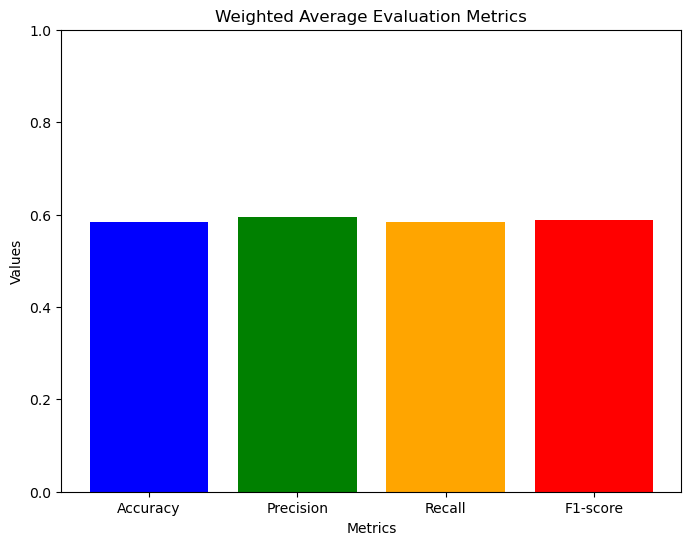

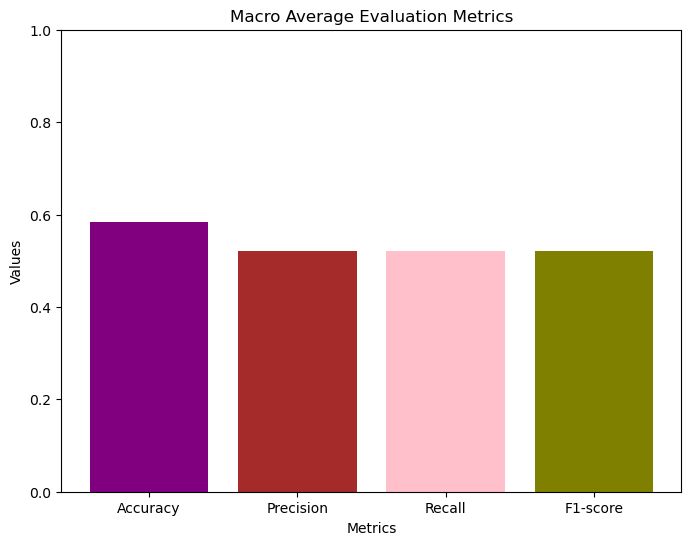

In [22]:
from sklearn.metrics import classification_report

eval_results = trainer.evaluate()
class_report = classification_report(y_test, predicted_labels, target_names=['undepressed', 'depressed'], output_dict=True)

accuracy = class_report['accuracy']
precision_weighted = class_report['weighted avg']['precision']
recall_weighted = class_report['weighted avg']['recall']
f1_weighted = class_report['weighted avg']['f1-score']

precision_macro = class_report['macro avg']['precision']
recall_macro = class_report['macro avg']['recall']
f1_macro = class_report['macro avg']['f1-score']

# Plot weighted average metrics
plt.figure(figsize=(8, 6))
metrics_weighted = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values_weighted = [accuracy, precision_weighted, recall_weighted, f1_weighted]
plt.bar(metrics_weighted, values_weighted, color=['blue', 'green', 'orange', 'red'])
plt.title('Weighted Average Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.show()

# Plot macro average metrics
plt.figure(figsize=(8, 6))
metrics_macro = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values_macro = [accuracy, precision_macro, recall_macro, f1_macro]
plt.bar(metrics_macro, values_macro, color=['purple', 'brown', 'pink', 'olive'])
plt.title('Macro Average Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.show()

In [23]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

In [24]:
conf_matrix

array([[17,  8],
       [ 7,  4]], dtype=int64)